# Generate SMILES and Images of Beta-Cleavage Mechanism

In [1]:
smiles_str = "[CH2]COO"


In [3]:
import sys
from rdkit import Chem
from pathlib import Path
import pandas as pd
from rdkit.Chem import Draw

sys.path.append("..")

from protopilot.mechanisms.smi import iterate

mol = Chem.MolFromSmiles(smiles_str)

output = iterate(smiles_str, [smiles_str])
df = pd.DataFrame(output)
header = ["Initial"]
for i in range((len(df.columns) - 1) // 3):
    header += [
        f"Transition {i + 1}",
        f"Stable Product {i + 1}",
        f"Radical Product {i + 1}",
    ]

for path in output:
    transitions = path[1::3]  # Extract transition states
    stable_products = path[2::3]  # Extract stable products
    radicals = path[3::3]  # Extract radical products
    # Build a single string: start with smiles_str, then for each step add transition, stable + radical
    result_str = smiles_str
    for t, s, r in zip(transitions, stable_products, radicals):
        result_str += f" -> {t} -> {s} + {r}"
    print(result_str)
    # Filter out None values and those containing "Check for resonance"
    smiles_list = [s for s in path if s is not None and "Check for resonance" not in s]
    mols = [Chem.MolFromSmiles(s) for s in smiles_list]
    # Remove any None molecules (in case of invalid SMILES)
    mols = [m for m in mols if m is not None]
    if mols:
        img = Draw.MolsToGridImage(
            mols, molsPerRow=5, subImgSize=(200, 200), legends=smiles_list
        )
        display(img)


ModuleNotFoundError: No module named 'protopilot'

In [1]:
smiles = r"[CH2]CCC1CO1"

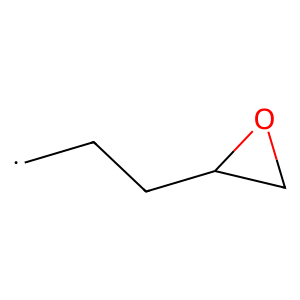

In [2]:
# Just drawing the original molecule with highlighted radicals
from rdkit.Chem import Draw
from rdkit import Chem

# Drawing
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(
    mol,
    molsPerRow=1,
    subImgSize=(200, 200),
    highlightAtomLists=[
        [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetNumRadicalElectrons() > 0]
    ],
    highlightAtomColors=[
        {
            atom.GetIdx(): (1.0, 0.0, 0.0)
            for atom in mol.GetAtoms()
            if atom.GetNumRadicalElectrons() > 0
        }
    ],
    highlightAtomRadii=[
        {
            atom.GetIdx(): 0.6
            for atom in mol.GetAtoms()
            if atom.GetNumRadicalElectrons() > 0
        }
    ],
)

display(img)